In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('train(1).csv',usecols=['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df.shape

(714, 3)

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
# without applying binning
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [23]:
clf=DecisionTreeClassifier()

In [25]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [29]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330594679186228

In [31]:
#after using discretizer

In [33]:
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')

In [39]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [41]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn

In [43]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', strategy='kmeans')}

In [45]:
trf.named_transformers_['first'].n_bins_

array([5])

In [47]:
trf.named_transformers_['second'].n_bins_

array([5])

In [49]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  42.42381445, 100.62403884, 186.50018901,
              376.60581786, 512.3292    ])                           ],
      dtype=object)

In [51]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [53]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [65]:

output.sample

<bound method NDFrame.sample of       age  age_trf      fare  fare_trf        age_labels        fare_labels
328  31.0      2.0   20.5250       0.0  (27.028, 39.354]      (0.0, 42.424]
73   26.0      1.0   14.4542       0.0  (12.696, 27.028]      (0.0, 42.424]
253  30.0      2.0   16.1000       0.0  (27.028, 39.354]      (0.0, 42.424]
719  33.0      2.0    7.7750       0.0  (27.028, 39.354]      (0.0, 42.424]
666  25.0      1.0   13.0000       0.0  (12.696, 27.028]      (0.0, 42.424]
..    ...      ...       ...       ...               ...                ...
92   46.0      3.0   61.1750       1.0  (39.354, 54.215]  (42.424, 100.624]
134  25.0      1.0   13.0000       0.0  (12.696, 27.028]      (0.0, 42.424]
337  41.0      3.0  134.5000       2.0  (39.354, 54.215]   (100.624, 186.5]
548  33.0      2.0   20.5250       0.0  (27.028, 39.354]      (0.0, 42.424]
130  33.0      2.0    7.8958       0.0  (27.028, 39.354]      (0.0, 42.424]

[571 rows x 6 columns]>

In [57]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [61]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [67]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Ruchit Chaudhary\anaconda3\Lib\site-packages\sklearn

0.6330790297339594

In [69]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6316705790297339


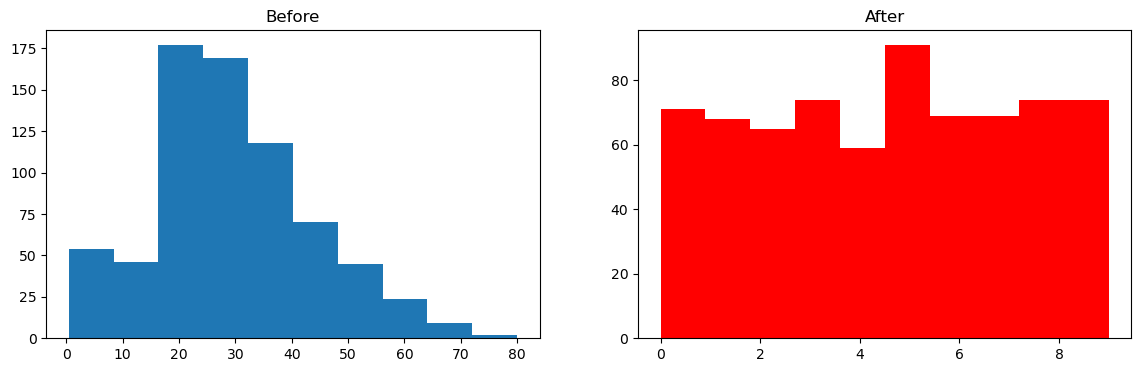

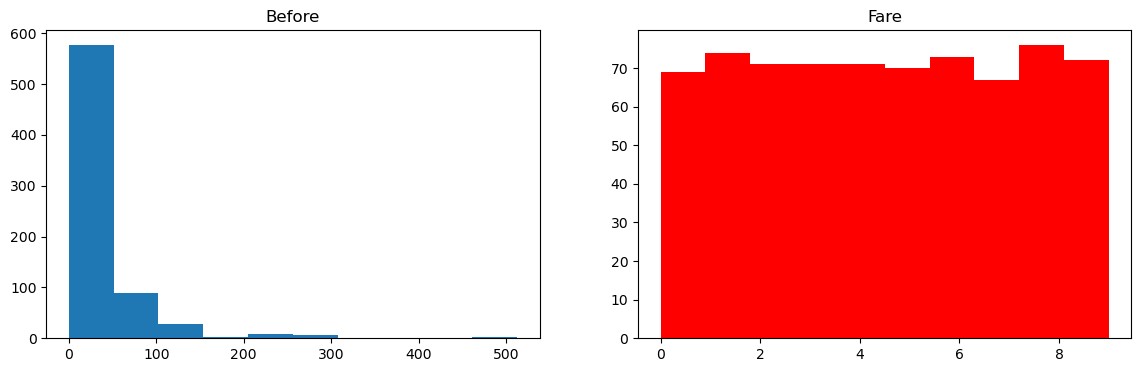

In [77]:
discretize(10,'quantile')